In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error 

In [2]:
train=pd.read_csv('C:/Users/Сергей/Desktop/HousePrices/train.csv')
test=pd.read_csv('C:/Users/Сергей/Desktop/HousePrices/test.csv')
sample_submission=pd.read_csv('C:/Users/Сергей/Desktop/HousePrices/sample_submission.csv')
display(train)
display(test)
display(sample_submission)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [3]:
y_train=train['SalePrice']
train=train.drop(['Id','SalePrice'],axis=1)
test=test.drop(['Id'],axis=1)
X=pd.concat([train,test],ignore_index=True)
display(X)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [5]:
print(pd.unique(X['Street']))
print(pd.unique(X['Alley']))
print(pd.unique(X['FireplaceQu']))
print(pd.unique(X['Fence']))
print(pd.unique(X['MiscFeature']))
display(X[['Street','Alley','Fireplaces','FireplaceQu','PoolArea','PoolQC','Fence','MiscFeature']].head(60))

['Pave' 'Grvl']
[nan 'Grvl' 'Pave']
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
[nan 'Shed' 'Gar2' 'Othr' 'TenC']


,Street,Alley,Fireplaces,FireplaceQu,PoolArea,PoolQC,Fence,MiscFeature
0,Pave,NaN,0,NaN,0,NaN,NaN,NaN
1,Pave,NaN,1,TA,0,NaN,NaN,NaN
2,Pave,NaN,1,TA,0,NaN,NaN,NaN
3,Pave,NaN,1,Gd,0,NaN,NaN,NaN
4,Pave,NaN,1,TA,0,NaN,NaN,NaN
5,Pave,NaN,0,NaN,0,NaN,MnPrv,Shed
6,Pave,NaN,1,Gd,0,NaN,NaN,NaN
7,Pave,NaN,2,TA,0,NaN,NaN,Shed
8,Pave,NaN,2,TA,0,NaN,NaN,NaN
9,Pave,NaN,2,TA,0,NaN,NaN,NaN


In [6]:
X['Alley']=X['Alley'].fillna('No')
X['FireplaceQu']=X['FireplaceQu'].fillna('No')
X['PoolQC']=X['PoolQC'].fillna('No')
X['Fence']=X['Fence'].fillna('No')
X['MiscFeature']=X['MiscFeature'].fillna('No')
display(X)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,...,0,0,No,No,No,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,...,0,0,No,No,No,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,...,0,0,No,No,No,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,...,0,0,No,No,No,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
cols=[]
for col in X.columns:
    if X[col].isnull().sum()>0:
        cols.append(col)
print(cols)

['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'SaleType']


In [8]:
cols1=cols[:int(len(cols)/2)]
cols2=cols[int(len(cols)/2):]
display(X[cols1])
display(X[cols2])

,MSZoning,LotFrontage,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2
0,RL,65.0,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,No,GLQ,706.0,Unf,0.0
1,RL,80.0,AllPub,MetalSd,MetalSd,None,0.0,Gd,TA,Gd,ALQ,978.0,Unf,0.0
2,RL,68.0,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Mn,GLQ,486.0,Unf,0.0
3,RL,60.0,AllPub,Wd Sdng,Wd Shng,None,0.0,TA,Gd,No,ALQ,216.0,Unf,0.0
4,RL,84.0,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Av,GLQ,655.0,Unf,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,21.0,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,No,Unf,0.0,Unf,0.0
2915,RM,21.0,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,No,Rec,252.0,Unf,0.0
2916,RL,160.0,AllPub,VinylSd,VinylSd,None,0.0,TA,TA,No,ALQ,1224.0,Unf,0.0
2917,RL,62.0,AllPub,HdBoard,Wd Shng,None,0.0,Gd,TA,Av,GLQ,337.0,Unf,0.0


,BsmtUnfSF,TotalBsmtSF,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,SaleType
0,150.0,856.0,SBrkr,1.0,0.0,Gd,Typ,Attchd,2003.0,RFn,2.0,548.0,TA,TA,WD
1,284.0,1262.0,SBrkr,0.0,1.0,TA,Typ,Attchd,1976.0,RFn,2.0,460.0,TA,TA,WD
2,434.0,920.0,SBrkr,1.0,0.0,Gd,Typ,Attchd,2001.0,RFn,2.0,608.0,TA,TA,WD
3,540.0,756.0,SBrkr,1.0,0.0,Gd,Typ,Detchd,1998.0,Unf,3.0,642.0,TA,TA,WD
4,490.0,1145.0,SBrkr,1.0,0.0,Gd,Typ,Attchd,2000.0,RFn,3.0,836.0,TA,TA,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,546.0,546.0,SBrkr,0.0,0.0,TA,Typ,NaN,NaN,NaN,0.0,0.0,NaN,NaN,WD
2915,294.0,546.0,SBrkr,0.0,0.0,TA,Typ,CarPort,1970.0,Unf,1.0,286.0,TA,TA,WD
2916,0.0,1224.0,SBrkr,1.0,0.0,TA,Typ,Detchd,1960.0,Unf,2.0,576.0,TA,TA,WD
2917,575.0,912.0,SBrkr,0.0,1.0,TA,Typ,NaN,NaN,NaN,0.0,0.0,NaN,NaN,WD


In [9]:
for col in cols:
    if col in ['MasVnrArea','BsmtFinSF1','BsmtFinSF2','GarageArea','BsmtUnfSF','TotalBsmtSF']:
        X[col]=X[col].fillna(X[col].mean())
    if col in ['BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars']:
        X[col]=X[col].fillna(X[col].median())
    else:
        X[col]=X[col].fillna(X[col].mode()[0])
X.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [10]:
display(X)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,...,0,0,No,No,No,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,...,0,0,No,No,No,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,...,0,0,No,No,No,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,...,0,0,No,No,No,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,MnPrv,Shed,700,7,2006,WD,Normal


In [11]:
cols=[]
for col in X.columns:
    if X[col].dtype=='object':
        cols.append(col)
print(cols)        

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [12]:
LE=LabelEncoder()
for col in cols:
    X[col]=LE.fit_transform(X[col])
display(X)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,0,3,4,1,0,2,2008,8,4
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,0,3,4,1,0,5,2007,8,4
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,0,3,4,1,0,9,2008,8,4
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,0,3,4,1,0,2,2006,8,0
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,0,3,4,1,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,4,21.0,1936,1,1,3,3,0,4,...,0,0,3,4,1,0,6,2006,8,4
2915,160,4,21.0,1894,1,1,3,3,0,4,...,0,0,3,4,1,0,4,2006,8,0
2916,20,3,160.0,20000,1,1,3,3,0,4,...,0,0,3,4,1,0,9,2006,8,0
2917,85,3,62.0,10441,1,1,3,3,0,4,...,0,0,3,2,3,700,7,2006,8,4


In [13]:
X_train=X.iloc[:train.shape[0],:]
X_test=X.iloc[train.shape[0]:,:]
display(X_train)
display(X_test)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,0,3,4,1,0,2,2008,8,4
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,0,3,4,1,0,5,2007,8,4
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,0,3,4,1,0,9,2008,8,4
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,0,3,4,1,0,2,2006,8,0
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,0,3,4,1,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,1,3,3,0,4,...,0,0,3,4,1,0,8,2007,8,4
1456,20,3,85.0,13175,1,1,3,3,0,4,...,0,0,3,2,1,0,2,2010,8,4
1457,70,3,66.0,9042,1,1,3,3,0,4,...,0,0,3,0,3,2500,5,2010,8,4
1458,20,3,68.0,9717,1,1,3,3,0,4,...,0,0,3,4,1,0,4,2010,8,4


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1460,20,2,80.0,11622,1,1,3,3,0,4,...,120,0,3,2,1,0,6,2010,8,4
1461,20,3,81.0,14267,1,1,0,3,0,0,...,0,0,3,4,0,12500,6,2010,8,4
1462,60,3,74.0,13830,1,1,0,3,0,4,...,0,0,3,2,1,0,3,2010,8,4
1463,60,3,78.0,9978,1,1,0,3,0,4,...,0,0,3,4,1,0,6,2010,8,4
1464,120,3,43.0,5005,1,1,0,1,0,4,...,144,0,3,4,1,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,4,21.0,1936,1,1,3,3,0,4,...,0,0,3,4,1,0,6,2006,8,4
2915,160,4,21.0,1894,1,1,3,3,0,4,...,0,0,3,4,1,0,4,2006,8,0
2916,20,3,160.0,20000,1,1,3,3,0,4,...,0,0,3,4,1,0,9,2006,8,0
2917,85,3,62.0,10441,1,1,3,3,0,4,...,0,0,3,2,3,700,7,2006,8,4


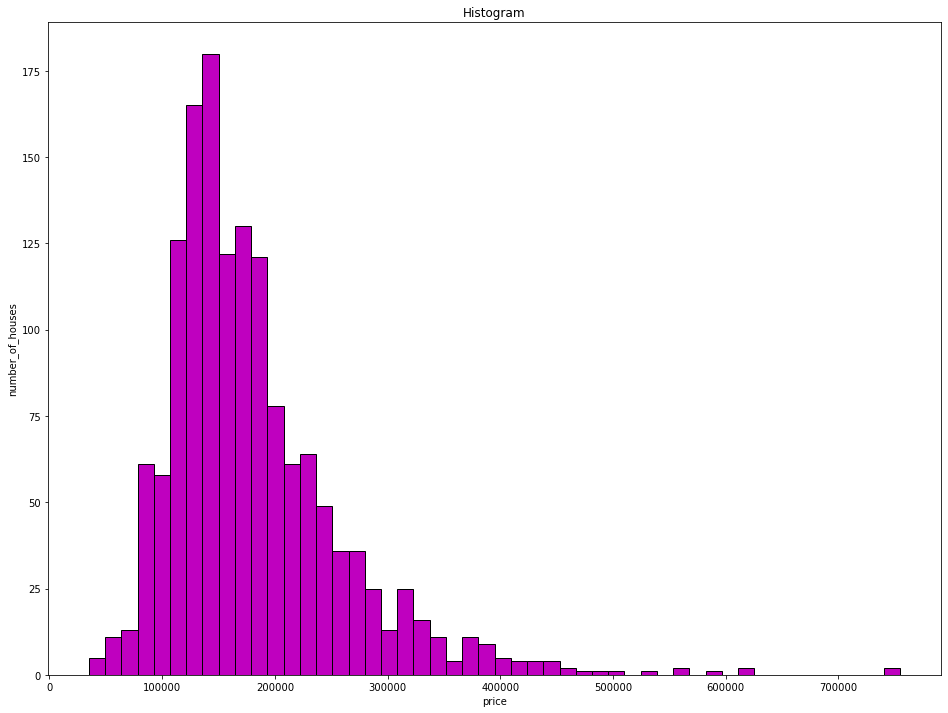

Mean: 180921.19589041095
Variance: 6311111264.297451
Median: 163000.0
Min: 34900
Max: 755000


In [14]:
fig=plt.figure(figsize=(16,12))
ax=fig.add_subplot(1,1,1)
ax.set_title('Histogram')
ax.set_xlabel('price')
ax.set_ylabel('number_of_houses')
ax.hist(y_train,bins=50,ec='black',color='m')
plt.show()
print('Mean:',y_train.mean())
print('Variance:',y_train.var())
print('Median:',y_train.median())
print('Min:',y_train.min())
print('Max:',y_train.max())

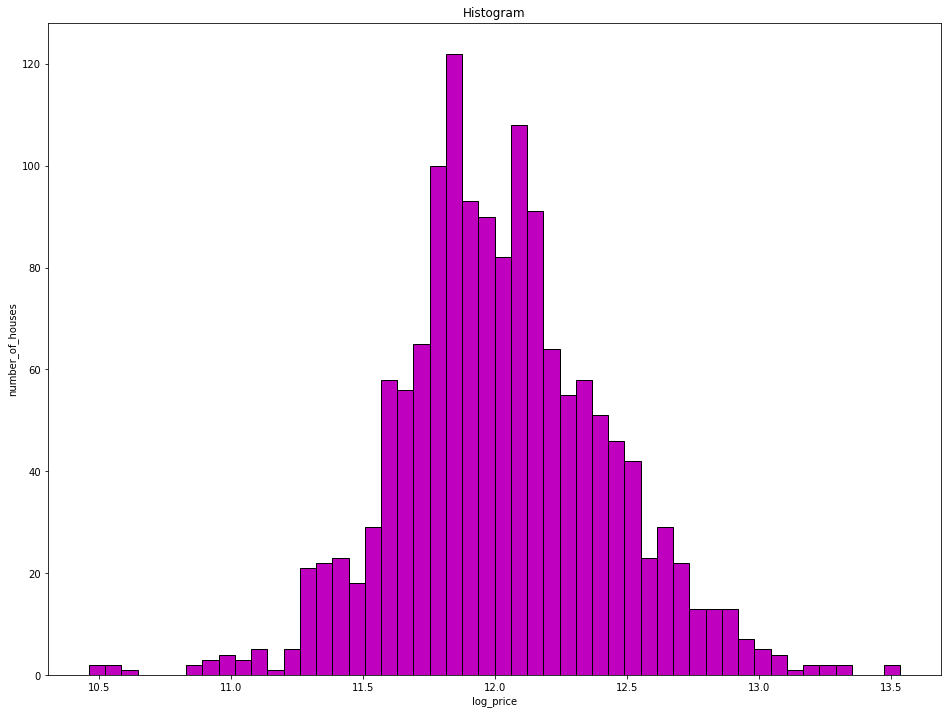

Mean: 12.024050901109373
Variance: 0.15956179505733478
Median: 12.0015054797889
Min: 10.460242108190519
Max: 13.534473028231162


In [15]:
y_train=np.log(y_train)
fig=plt.figure(figsize=(16,12))
ax=fig.add_subplot(1,1,1)
ax.set_title('Histogram')
ax.set_xlabel('log_price')
ax.set_ylabel('number_of_houses')
ax.hist(y_train,bins=50,ec='black',color='m')
plt.show()
print('Mean:',y_train.mean())
print('Variance:',y_train.var())
print('Median:',y_train.median())
print('Min:',y_train.min())
print('Max:',y_train.max())

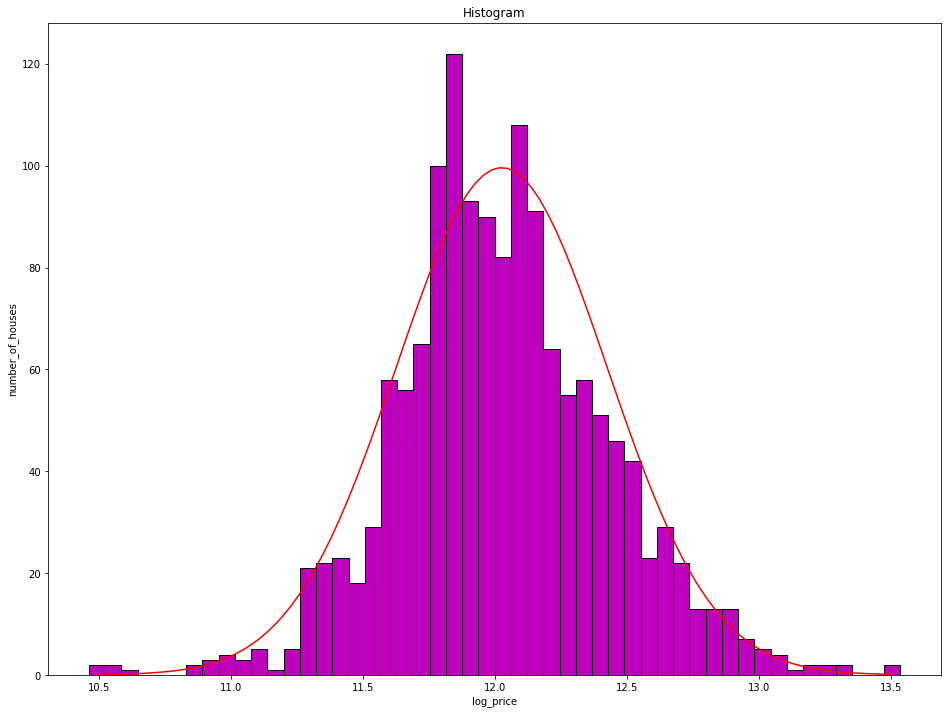

In [16]:
fig=plt.figure(figsize=(16,12))
ax=fig.add_subplot(1,1,1)
ax.set_title('Histogram')
ax.set_xlabel('log_price')
ax.set_ylabel('number_of_houses')
ax.hist(y_train,bins=50,ec='black',color='m')
x=np.linspace(10.5,13.5,100)
y=250*(1/(2*np.pi*y_train.var()**0.5))*np.exp(-((x-y_train.mean())**2)/(2*y_train.var()))
ax.plot(x,y,color='r')
plt.show()

In [17]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=0)

In [27]:
max_features=[i for i in range(1,20)]
n_estimators=[50*i for i in range(1,9)]
learning_rate=np.linspace(0.05,0.06,29)
print(learning_rate)
grid=GridSearchCV(GradientBoostingRegressor(),{'learning_rate':learning_rate,'max_features':max_features,'n_estimators':n_estimators},scoring='neg_mean_squared_error').fit(X_val,y_val)
print('Best score:',grid.best_score_)
print('Coefs:',grid.best_params_)

[0.05       0.05035714 0.05071429 0.05107143 0.05142857 0.05178571
 0.05214286 0.0525     0.05285714 0.05321429 0.05357143 0.05392857
 0.05428571 0.05464286 0.055      0.05535714 0.05571429 0.05607143
 0.05642857 0.05678571 0.05714286 0.0575     0.05785714 0.05821429
 0.05857143 0.05892857 0.05928571 0.05964286 0.06      ]
Best score: -0.017614168749863025
Coefs: {'learning_rate': 0.053214285714285714, 'max_features': 12, 'n_estimators': 400}


In [28]:
Model=GradientBoostingRegressor(learning_rate=0.053214285714285714,max_depth=3,max_features=12,n_estimators=400).fit(X_train,y_train)
print('Train mse:',mean_squared_error(y_train,Model.predict(X_train)))
print('Val mse:',mean_squared_error(y_val,Model.predict(X_val)))
y_pred=Model.predict(X_test)

Train mse: 0.004572030202200087
Val mse: 0.01326824067456585


In [29]:
sample_submission['SalePrice']=np.exp(y_pred)
sample_submission.to_csv('HP.csv',index=False)
display(sample_submission)

,Id,SalePrice
0,1461,123524.901831
1,1462,149213.337569
2,1463,184884.229696
3,1464,189873.856895
4,1465,190385.524464
...,...,...
1454,2915,82031.919508
1455,2916,82187.635782
1456,2917,165432.851224
1457,2918,124470.693165
